In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models
from tensorflow.keras.utils import plot_model 

In [5]:
data = pd.read_csv('gpascore.csv')

#preprocessing
data = data.dropna() # dropna() : 결측치가 있는 행을 제거

# data.fillna(100) # fillna() : 결측치를 100으로 채움
# data['gpa'] # gpa 열을 가져옴
# data['gpa'].min() # gpa 열의 최소값
# data['gpa'].count() # gpa 열의 개수


In [6]:
# y 입력값 만들기 (Label) ## y = [정답1, 정답2, 정답3 ...]
y_data = data['admit'].values # admit 열을 가져옴
# x 입력값 만들기 (Feature) ## x = [입력값1, 입력값2, 입력값3 ...]
x_data = []

for i, rows in data.iterrows(): # iterrows() : 모든 행을 순회하면서 행의 인덱스와 행의 데이터를 가져옴
   x_data.append([ rows['gre'], rows['gpa'], rows['rank'] ]) # x_data = [ [gre1, gpa1, rank1], [gre2, gpa2, rank2], [gre3, gpa3, rank3] ... ]


In [9]:

# 모델 만들기
model = tf.keras.models.Sequential([
   tf.keras.layers.Dense(64, activation='relu'),                                
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid'), # 0 ~ 1 사이의 값은 sigmoid 함수를 사용
])

# 모델을 학습시킬 최적화 방법
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(np.array(x_data), np.array(y_data), epochs=100)
# X 데이터 예시 [ [380,3.21,3], [660,3.67,3], [], [], .... ]
# Y 데이터 예시 [ [0], [1], [0], [1], .... ]


Epoch 1/100
14/14 [==============================] - 1s 1ms/step - loss: 2.5334 - accuracy: 0.4871
Epoch 2/100
14/14 [==============================] - 0s 1ms/step - loss: 1.6382 - accuracy: 0.4659
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 0.9087 - accuracy: 0.4988
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5553
Epoch 5/100
14/14 [==============================] - 0s 1ms/step - loss: 0.7509 - accuracy: 0.5435
Epoch 6/100
14/14 [==============================] - 0s 1ms/step - loss: 0.7895 - accuracy: 0.5271
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.7925 - accuracy: 0.5200
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.7867 - accuracy: 0.5247
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.5694
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 0.7102 - accuracy: 0.5529
Epoch 11/

In [10]:

# 모델 저장
model.save('my_model.h5')


# 예측
예측값 = model.predict([ [750, 3.70, 3], [400, 2.2, 1] ])
print(예측값)

1/1 [==============================] - 0s 90ms/step
[[0.62364966]
 [0.48234543]]


<function matplotlib.pyplot.show(close=None, block=None)>

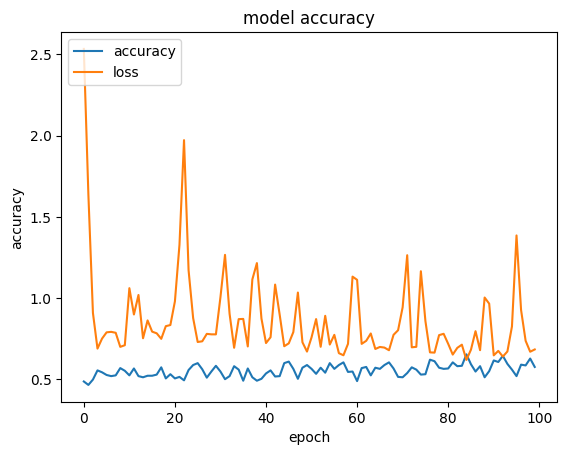

In [17]:

# 훈련과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show

In [25]:
plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shape.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
